# M77 Coursework: 3D "Pac-Man"
The following coursework is designed to test multiple components of the module sylabus; including 3D geometry, object detection, feature extraction and image manipulation.

Your task is to complete the below skeleton code to play a Pac-Man-esque game in 3D. You are allowed to utilise method discussed in the course, including feature extractors and deep learning approaches.

The aim of the coursework is to step through a 3D pointcloud of the old PhD lab at Swansea University. Several large spheres have been placed within the space, it is your job to move through the pointcloud in an automated fashion, detecting the location of the sphere and moving to the predicted 3D location. If you land close enough to a sphere it will be captured and removed from the pointcloud. 

You will need to decide what kinds of feature you want to use, extract these features and train a classifier to detect the spheres within an image. You can then use the functionality provided in the PacMan_functionality.py module to obtain the XYZ coordinates of the pixel you predict to be a sphere.


## Imports
Hre we will do our usual imports. I would recommend numpy, scipy, skimage, matplotlib and sklearn. If you wish to utilise pointcloud visualisation then you can do that as described in the handout via Open3D. We will want to import our PacMan_functionality module as well.

In [14]:
import PacMan_functionality as PacMan
import open3d
import os
import matplotlib.pyplot as plt
import numpy as np

import sklearn.ensemble
import skimage

## Game setup.
This cell will initialise the game world and add all of our spheres to the world. Do not edit the code here.

In [15]:
# Call startup_scene() to load the initial game scene
#load in point cloud and list of spheres collected
global_cloud, spheres_collected = PacMan.startup_scene()
print(spheres_collected)

[False, False, False, False, False, False, False, False, False, False, False]


In [16]:
# View our pointcloud if we want
pcd = open3d.geometry.PointCloud(open3d.utility.Vector3dVector(global_cloud['Positions']))
pcd.colors = open3d.utility.Vector3dVector(global_cloud['Colors']/255)

open3d.visualization.draw_geometries([pcd])

## Load the training data: Positives and Negatives
In the handout zip file there is a directory which contains numerous patches extracted from sample images. These patches are labelled as either containing a sphere or not. You may wish to use these to train a classifier for sphere detection. This classifier can then be used later to detect spheres and move our camera towars them.

In [17]:
# Get the training samples for both positive and negative patches
neg_path = os.path.join('.','TrainingImages', 'negatives')
pos_path = os.path.join('.','TrainingImages', 'positives')

neg_files = os.listdir(neg_path)
pos_files = os.listdir(pos_path)

#loop through negative files and append to the negatives array
negatives = []
for i_file in neg_files:
    negatives.append(plt.imread(os.path.join(neg_path, i_file)))
    
#loop through positive files and append to the positives array
positives = []
for i_file in pos_files:
    positives.append(plt.imread(os.path.join(pos_path, i_file)))

# Concatenate the patches into a 4D numpy array (S*H*W*C), and create a label vector (S)
#number of samples by number of images
training_data = np.concatenate([negatives, positives])
#vector of length of number of samples 
training_labels = np.concatenate([np.zeros(len(negatives)), np.ones(len(positives))])

print(training_data.shape)
print(training_labels.shape)

(2036, 51, 51, 3)
(2036,)


## Train a classifier on the samples, this may require feature extraction on the patches
Depending on your desired apporach you may want to extract features on the training patches you have been given. These can then be used to train our desired classifier to detect the patches based not on the raw data, but on a representative feature descriptor. Several are talked about both in the lectures and labs. 

In [18]:
# Extract the features - maybe, might not be needed with representation learning approaches
extracted_features = []
for i in training_data:
    #can change to colour histograms
    extracted_features.append(skimage.feature.hog(i,channel_axis=-1))
extracted_features = np.asarray(extracted_features)

#print(extracted_features.shape)

In [19]:
# Train a classification model to perform binary classification of the patch into whether it contains a sphere or not.
#HERE YOU CAN DO AN SVM OR CNN OR RANDOM FOREST OR OTHER NEURAL NET 

#Example Video Random Forest Code:
model = sklearn.ensemble.RandomForestClassifier(n_estimators=500, verbose=1, n_jobs=15)
#learn to associate data with labels
model.fit(extracted_features, training_labels)

[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    1.7s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    4.2s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    5.0s finished


RandomForestClassifier(n_estimators=500, n_jobs=15, verbose=1)

## Initialise our starting point in the game and get our first view into the scene
We should start the game at a position of XYZ = [0, 0, 0] and a camera angle of [0, 0, 0]. These variables can be updated once we find a sphere, or rotated when we don't find a sphere. We can then get our first image projected to the camera plane to start our game. 

In [20]:
# Initialise position and angle variable 
position = np.zeros([3])
angle = np.zeros([3])

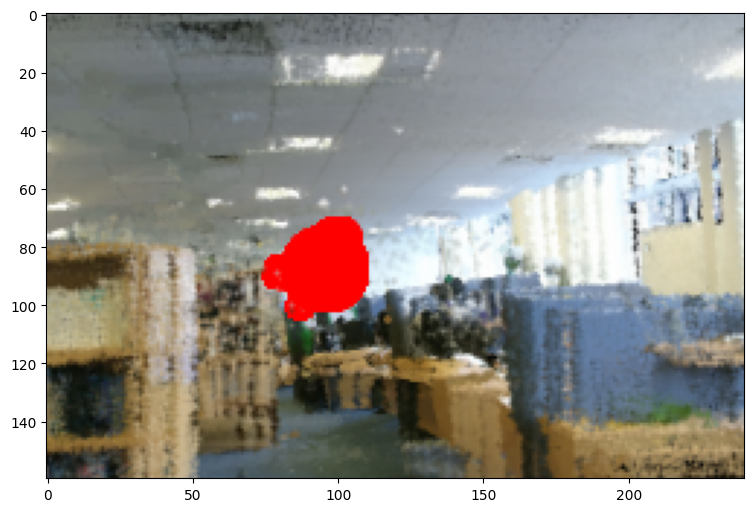

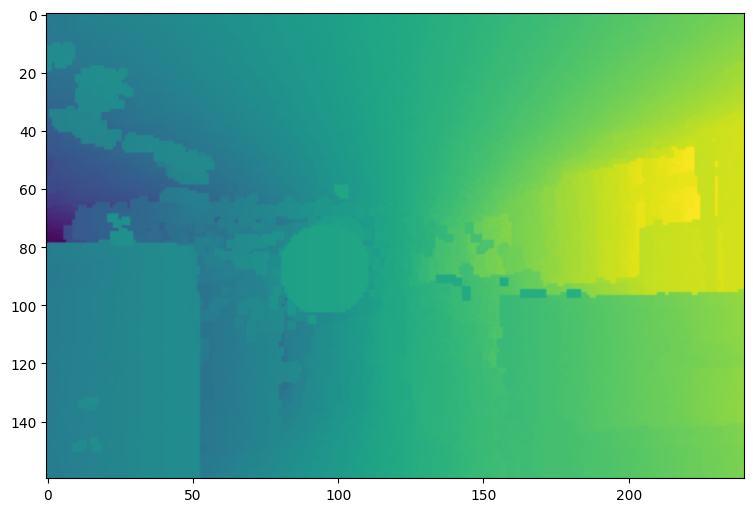

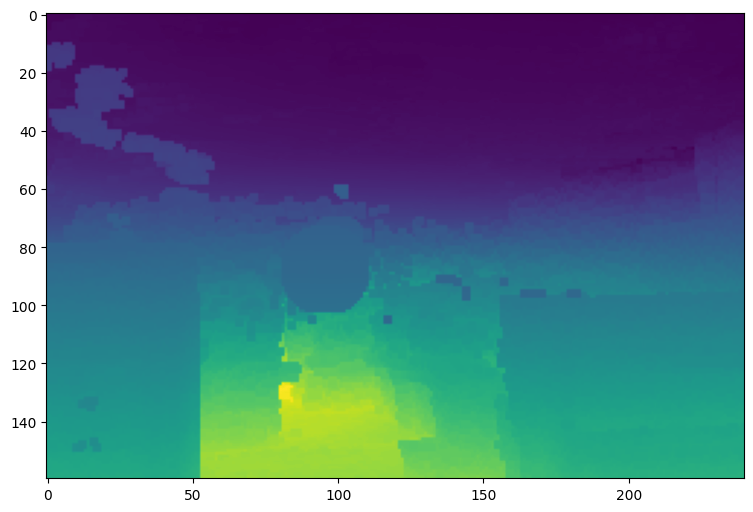

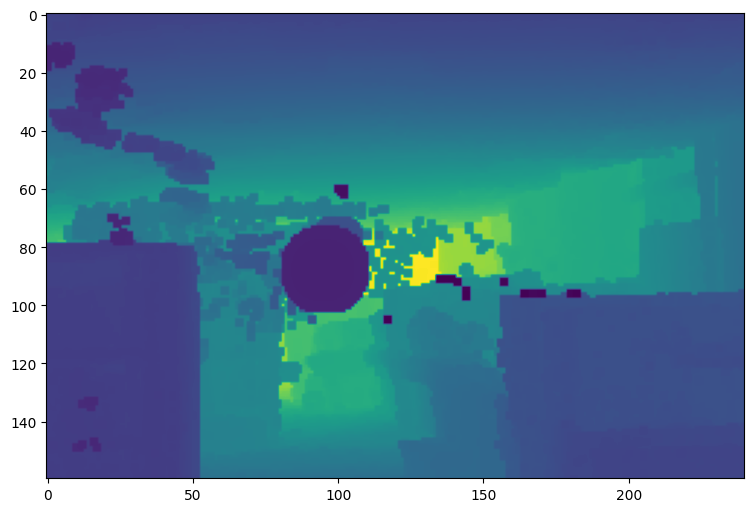

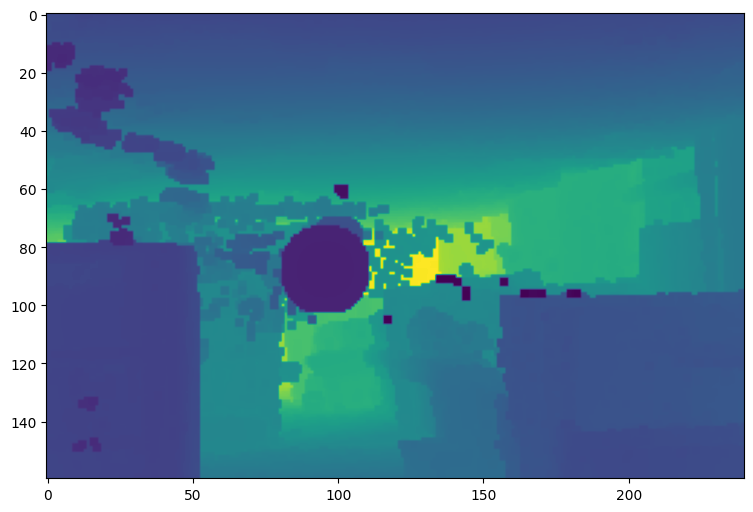

In [21]:
# Get the image, XYZ maps and depth map of the current viewpoint into the scene
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud,angle,position)

plt.figure()
plt.imshow(image)

plt.figure()
plt.imshow(mapx)

plt.figure()
plt.imshow(mapy)

plt.figure()
plt.imshow(mapz)

plt.figure()
plt.imshow(depth)

## Perform our loop, in which we will perform pixel-wise prediction on binary class label and then perform the correct action based on detection of spheres.
This will be the main bulk of your implementation, utilising the feature descriptors and trained models from the above cells. In each loop of the program we will want to:
-  Get current view into the scene
-  Extract patches from the scene
-  Extract features on the patches
-  Use the pretrained model to obtain class prediction probabilities
-  Identify if a sphere has been found in the scene
  -  If so, find the mapped XYZ location, move there and update the scene
  -  If not, rotate the camera in a bid to find the sphere


Capturing Image


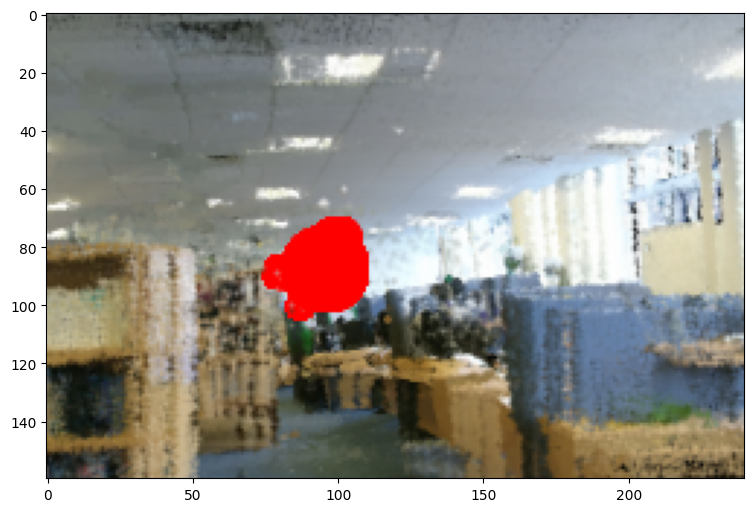

Padding Image


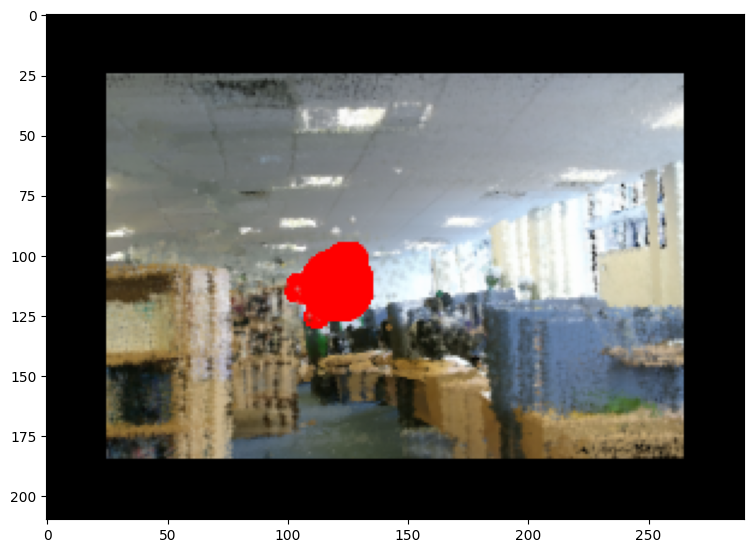

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.9s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    1.0s finished


Sphere found. Finding location.


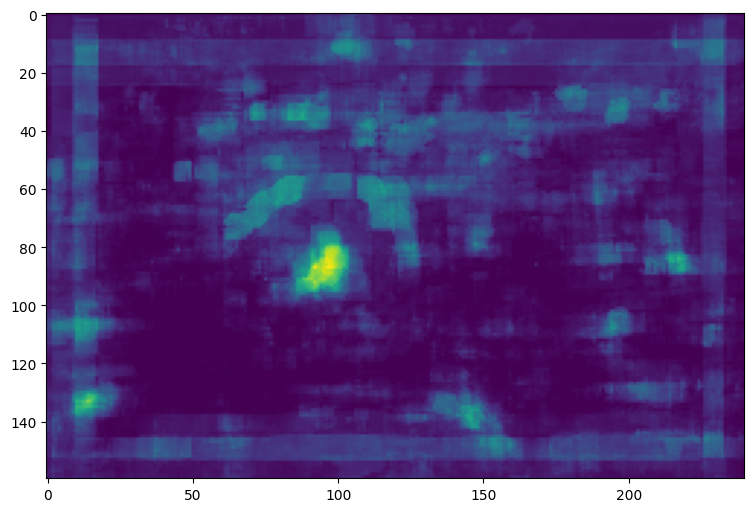

Updating Camera Position
New Position: [-0.1871553   0.05876877  2.309382  ]
Updating scene and list of collected spheres.
I have found: 1 out of 11 spheres!
Capturing Image


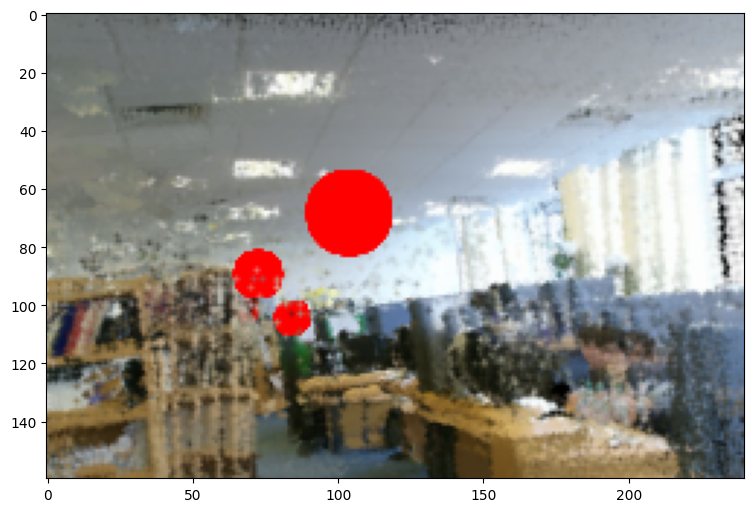

Padding Image


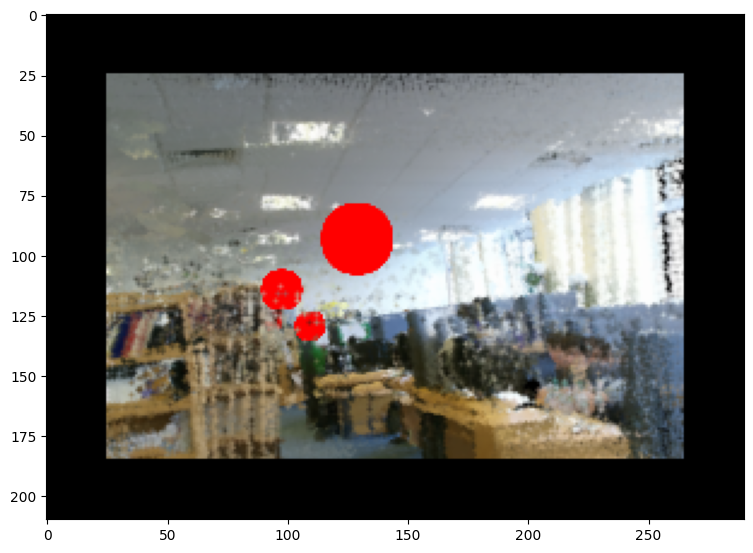

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    1.0s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    1.1s finished


Sphere found. Finding location.


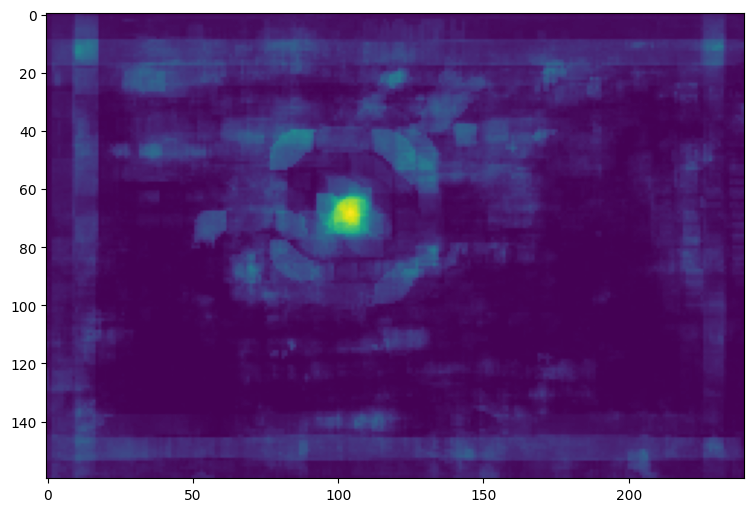

Updating Camera Position
New Position: [-0.31515571 -0.03429918  4.67350814]
Updating scene and list of collected spheres.
I have found: 2 out of 11 spheres!
Capturing Image


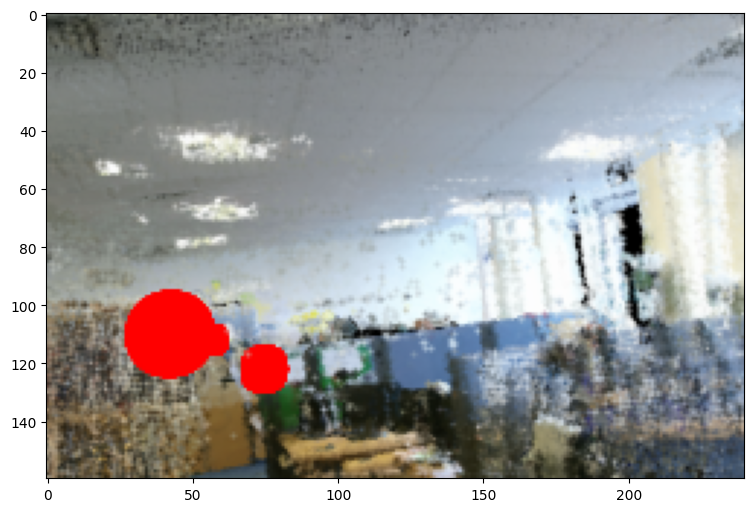

Padding Image


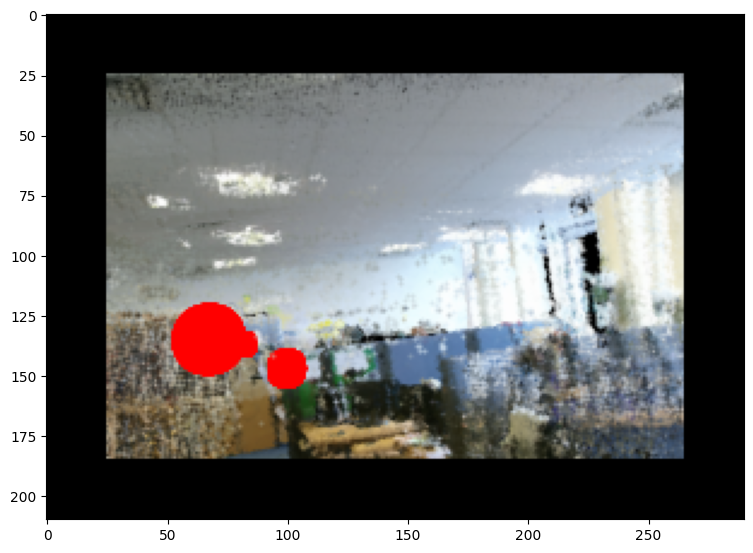

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    0.7s finished


Sphere found. Finding location.


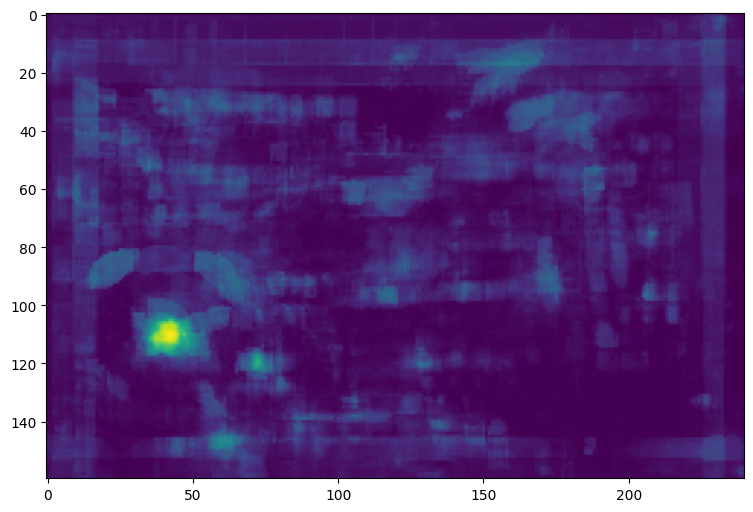

Updating Camera Position
New Position: [-0.92113967  0.19850687  7.01182695]
Updating scene and list of collected spheres.
I have found: 3 out of 11 spheres!
Capturing Image


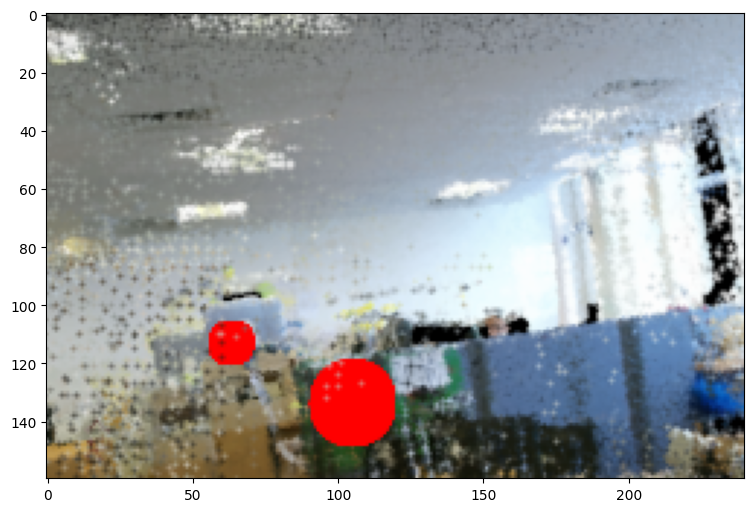

Padding Image


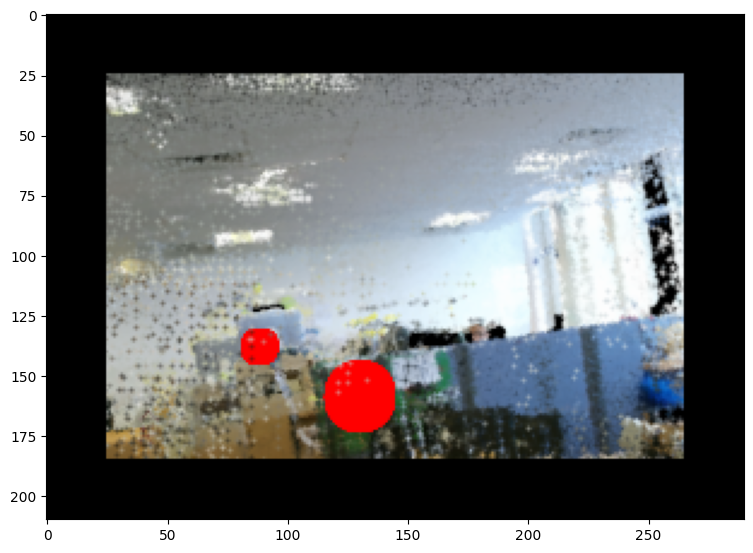

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    0.7s finished


Sphere found. Finding location.


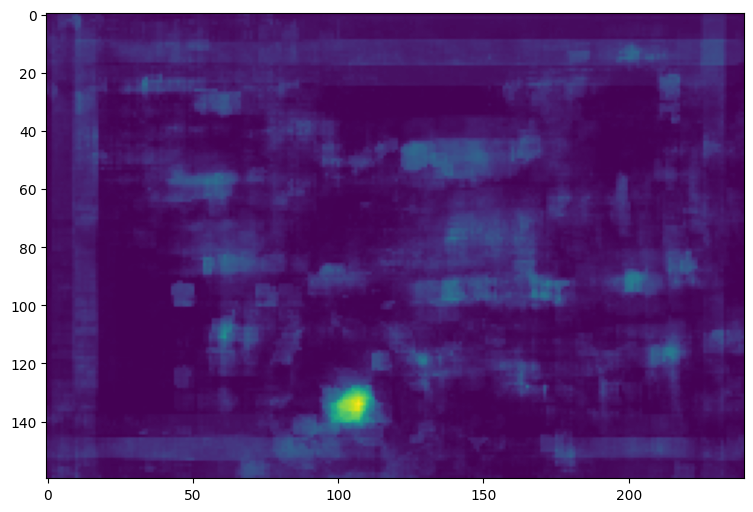

Updating Camera Position
New Position: [-1.03534785  0.62164911  9.37855697]
Updating scene and list of collected spheres.
I have found: 4 out of 11 spheres!
Capturing Image


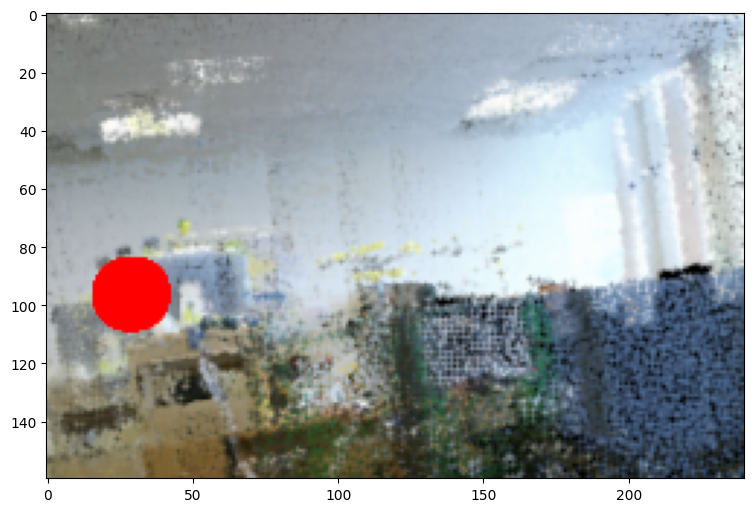

Padding Image


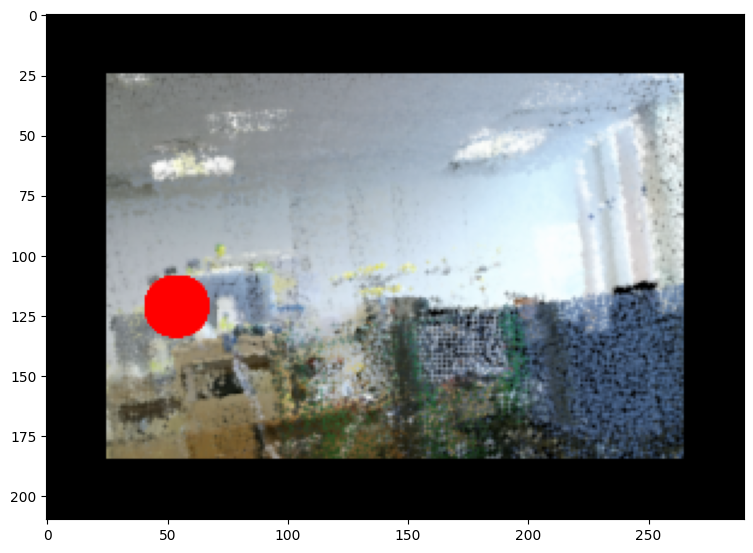

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    0.7s finished


Sphere found. Finding location.


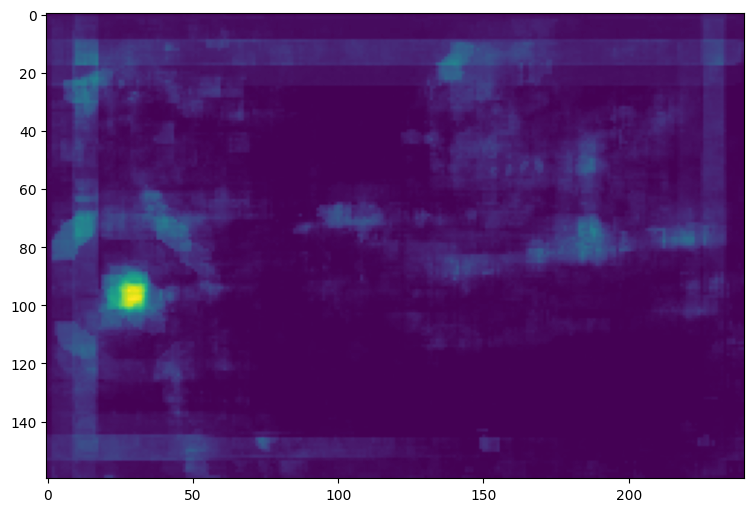

Updating Camera Position
New Position: [-1.88469332  0.77624856 12.17900078]
Updating scene and list of collected spheres.
I have found: 5 out of 11 spheres!
Capturing Image


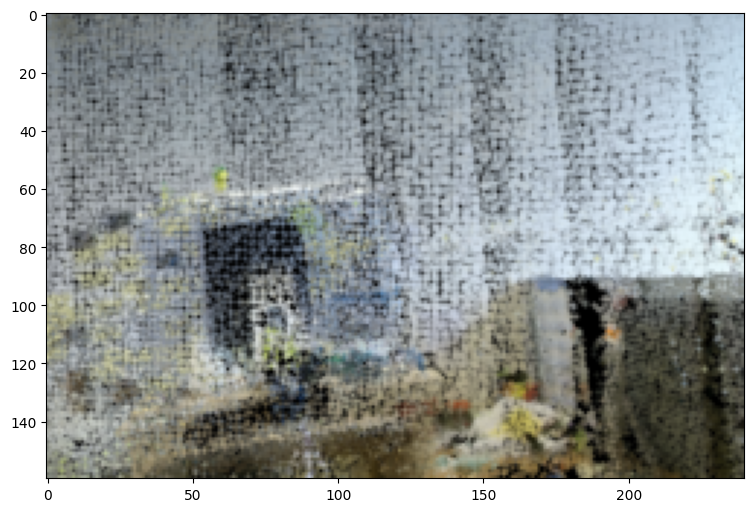

Padding Image


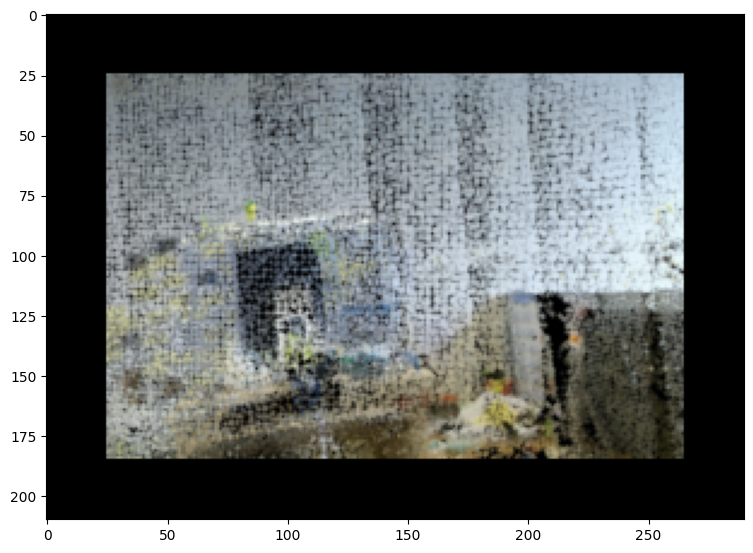

Extracting Patches
Patch 0
Patch 10000
Patch 20000
Patch 30000
Extracting Patch Features
Patch 0
Patch 10000
Patch 20000
Patch 30000
Predicting Probability of Sphere


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 500 out of 500 | elapsed:    0.7s finished


No sphere found. Rotating camera.
Updating Camera Position
New Position: [-2.52569723  0.89665359 14.27295017]
Updating scene and list of collected spheres.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
while not np.all(spheres_collected): # While there are spheres to find
    # Get current image from viewpoint
    print('Capturing Image')
    image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)
    plt.imshow(image)
    plt.show()
    
    #Pad image to extract patches from all valid pixels
    print('Padding Image')
    patch_range = np.asarray(training_data.shape[1:3]) // 2
    image_padding = np.pad(image, [(patch_range[0],patch_range[0]),
                                   (patch_range[1],patch_range[1]),
                                   (0,0)], 'constant')
    
    plt.imshow(image_padding)
    plt.show()
    
    # Extract patches from the scene
    print('Extracting Patches')
    patches = []
    patch_counter = 0
    for i_row in range(patch_range[0], image.shape[0] + patch_range[0]):
        for i_col in range(patch_range[1], image.shape[1] + patch_range[0]):
            patches.append(image_padding[i_row - patch_range[0]:i_row + patch_range[0]+1,
                                       i_col - patch_range[1]:i_col + patch_range[1]+1])
            if (patch_counter % 10000) == 0:
                print(f'Patch {patch_counter}')
            patch_counter += 1
            
    # Extract features from the patches
    print('Extracting Patch Features')
    patch_hog = []
    patch_counter = 0
    for patch in patches:
        patch_hog.append(skimage.feature.hog(patch, channel_axis=2))
        if (patch_counter % 10000) == 0:
            print(f'Patch {patch_counter}')
        patch_counter += 1
        
    # Predict the probability of a pixel being a sphere, based on the patch
    print('Predicting Probability of Sphere')
    test_features = np.asarray(patch_hog)
    prediction_probability = model.predict_proba(test_features)
    
    # Use probabilities to find sphere coordinates in 3D
    if not np.any(np.argmax(prediction_probability, axis=1)):
        # Update camera appropriately
        print("No sphere found. Rotating camera.")
        angle = angle + [0, -20 * np.pi / 180, 0]
    else:
        #Create heatmap of predictions
        print('Sphere found. Finding location.')
        predictive_heatmap = np.reshape(prediction_probability[:,1], image.shape[0:2])
        best = np.unravel_index(np.argmax(predictive_heatmap), predictive_heatmap.shape)
        plt.imshow(predictive_heatmap)
        plt.show()
        
        
    # Update camera appropriately
    print('Updating Camera Position')
    position[0] = mapx[best[0], best[1]]
    position[1] = mapy[best[0], best[1]]
    position[2] = mapz[best[0], best[1]]
    print(f'New Position: {position}')
    
    # Update scene if needed
    print('Updating scene and list of collected spheres.')
    global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected)
    print(f'I have found: {np.sum(spheres_collected)} out of {len(spheres_collected)} spheres!')
    